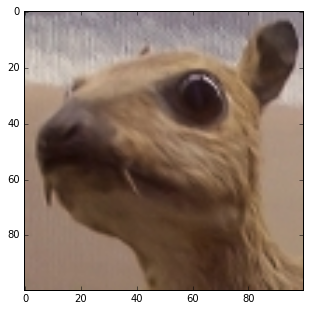

(100, 100, 3)


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png"
try:
    import urllib2
    data = urllib2.urlopen(url) #PNG
except Exception:
    import urllib.request
    from io import BytesIO
    data = BytesIO(urllib.request.urlopen(url).read()) #JPG
    
im = plt.imread(data)

plt.figure(figsize=(5, 5))
plt.imshow(im)
plt.show()

print(im.shape)

(100, 100)
[[ 0.51764709  0.50980395  0.49803922 ...,  0.58039218  0.57254905
   0.58431375]
 [ 0.50980395  0.5529412   0.50196081 ...,  0.58431375  0.55686277
   0.57647061]
 [ 0.5411765   0.57254905  0.61176473 ...,  0.59215689  0.56470591
   0.58431375]
 ..., 
 [ 0.5529412   0.56470591  0.56862748 ...,  0.60392159  0.58039218
   0.57647061]
 [ 0.5529412   0.55686277  0.57254905 ...,  0.63529414  0.60784316
   0.58039218]
 [ 0.5529412   0.56862748  0.57647061 ...,  0.56862748  0.6156863
   0.56862748]]


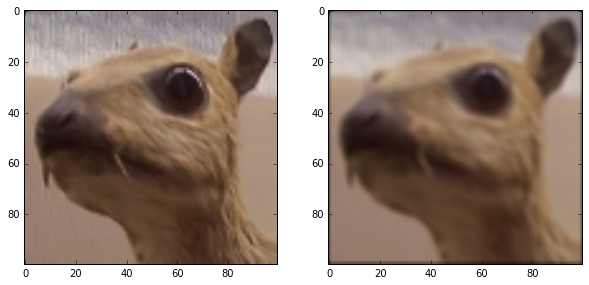

In [3]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import urllib2
import numpy as np
from scipy import ndimage

kernel = np.array(
    [[1, 1, 1], 
     [1, 1, 1], 
     [1, 1, 1]]) * 1.0 / 9.0

im_r = im[:,:,0]
print im_r.shape
print im_r
# convolve 2d the kernel with each channel
r = ndimage.convolve(im[:,:,0], kernel, mode='constant', cval=0.0)
g = ndimage.convolve(im[:,:,1], kernel, mode='constant', cval=0.0)
b = ndimage.convolve(im[:,:,2], kernel, mode='constant', cval=0.0)

# stack the channels back into a 8-bit colour depth image and plot it
im_out = (np.dstack([r, g, b]) * 255).astype(np.uint8) 

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()